Initial Discovery

In [115]:
import pandas as pd
import numpy as np

file = "C:\\Users\\Catren-PC\\Desktop\\DSI\\team_project\\data\\raw\\healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file)

In [116]:
df.drop(columns=['id'], inplace = True)

In [117]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Pre-processing

In [118]:
#Replace BMI with mean because it's only 4% missing
df.loc[:, "bmi"] = df["bmi"].fillna(df["bmi"].mean())

In [119]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
# Split dataset into all stroke patients and 5x the number of non-stroke patients (or try other ratios to see if improve model performance)
#  Enter code here
#
#

In [145]:
unique_values = df[['gender', 'work_type', 'Residence_type', 'ever_married', 'smoking_status']].apply(lambda x: x.value_counts()) 
unique_values

,gender,work_type,Residence_type,ever_married,smoking_status
Female,2994.0,NaN,NaN,NaN,NaN
Govt_job,NaN,657.0,NaN,NaN,NaN
Male,2116.0,NaN,NaN,NaN,NaN
Never_worked,NaN,709.0,NaN,NaN,NaN
No,NaN,NaN,NaN,1757.0,NaN
Private,NaN,2925.0,NaN,NaN,NaN
Rural,NaN,NaN,2514.0,NaN,NaN
Self-employed,NaN,819.0,NaN,NaN,NaN
Unknown,NaN,NaN,NaN,NaN,1544.0
Urban,NaN,NaN,2596.0,NaN,NaN


In [146]:
#Change children to never worked
df['work_type'] = df['work_type'].replace('children', 'Never_worked')

In [147]:
#Change Other to Male bc only applies to 1 row
df['gender'] = df['gender'].replace('Other', 'Male')

In [168]:
#Split dataset into predictors and outcome vars
X = df.drop(columns=['stroke'])
y = df['stroke']

In [169]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [170]:
print(numerical_cols)
print(categorical_cols)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [171]:
#change hypertension and heart disease into objects so they are flagged categorical
X[['hypertension', 'heart_disease']] = X[['hypertension', 'heart_disease']].astype('object')

In [172]:
#Update the numeric and categorical cols
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(numerical_cols) 
print(categorical_cols)

['age', 'avg_glucose_level', 'bmi']
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [173]:
#Scale the numeric cols and get dummies for categoricals
from sklearn.preprocessing import StandardScaler

categorical_cols = [col for col in categorical_cols if col in X.columns]

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

numerical_cols = [col for col in numerical_cols if col in X.columns]

if numerical_cols:
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(X[:5])

        age  avg_glucose_level           bmi  gender_Male  hypertension_1  \
0  1.051434           2.706375  1.001234e+00         True           False   
1  0.786070           2.121559  4.615554e-16        False           False   
2  1.626390          -0.005028  4.685773e-01         True           False   
3  0.255342           1.437358  7.154182e-01        False           False   
4  1.582163           1.501184 -6.357112e-01        False            True   

   heart_disease_1  ever_married_Yes  work_type_Never_worked  \
0             True              True                   False   
1            False              True                   False   
2             True              True                   False   
3            False              True                   False   
4            False              True                   False   

   work_type_Private  work_type_Self-employed  Residence_type_Urban  \
0               True                    False                  True   
1         

In [174]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numerical_cols = [col for col in numerical_cols if col in X.columns]

X_with_const = add_constant(X[numerical_cols])

vif_data = pd.DataFrame()
vif_data["Feature"] = numerical_cols

vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(len(numerical_cols))]

high_vif_features = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()

numerical_cols = [col for col in numerical_cols if col not in high_vif_features]

print(f"VIF features: {high_vif_features}")
print(vif_data)

#VIFs are low, no collinearity between continuous variables

VIF features: []
             Feature       VIF
0                age  1.000000
1  avg_glucose_level  1.163836
2                bmi  1.070682


In [175]:
import statsmodels.api as sm

# One-hot encoding
X_copy = X.copy()

#Turn booleans into numeric
X_copy = X_copy.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Add constant term for intercept in VIF calculation
X_copy = add_constant(X_copy)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_copy.columns
vif_data["VIF"] = [variance_inflation_factor(X_copy.values, i) for i in range(X_copy.shape[1])]

print(vif_data)

#All VIF values are <5

                           feature        VIF
0                            const  18.372104
1                              age   2.862727
2                avg_glucose_level   1.108071
3                              bmi   1.297426
4                      gender_Male   1.027903
5                   hypertension_1   1.118200
6                  heart_disease_1   1.114637
7                 ever_married_Yes   1.985902
8           work_type_Never_worked   3.252774
9                work_type_Private   2.363911
10         work_type_Self-employed   1.937562
11            Residence_type_Urban   1.002045
12  smoking_status_formerly smoked   1.597938
13     smoking_status_never smoked   1.781265
14           smoking_status_smokes   1.530601


C:\Users\Catren-PC\AppData\Local\Temp\ipykernel_39096\2404430165.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_copy = X_copy.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [176]:
X.info()
#The reference categories are: female, no HTN, no heart disease, never marries, gov worker, rural residence, unknown smoke

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   gender_Male                     5110 non-null   bool   
 4   hypertension_1                  5110 non-null   bool   
 5   heart_disease_1                 5110 non-null   bool   
 6   ever_married_Yes                5110 non-null   bool   
 7   work_type_Never_worked          5110 non-null   bool   
 8   work_type_Private               5110 non-null   bool   
 9   work_type_Self-employed         5110 non-null   bool   
 10  Residence_type_Urban            5110 non-null   bool   
 11  smoking_status_formerly smoked  5110 non-null   bool   
 12  smoking_status_never smoked     51

In [177]:
from sklearn.model_selection import train_test_split

#Change bools into 1 and 0 numeric
X = X.map(lambda x: 1 if x is True else (0 if x is False else x))

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 14)
(4088,)
(1022, 14)
(1022,)


In [178]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [179]:
y_pred = model.predict(X_test)

In [180]:
counts = np.bincount(y_pred)

print(counts[0])
print(counts[1])

732
290


In [181]:
print(y_test.value_counts())

stroke
0    972
1     50
Name: count, dtype: int64


In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# y_test: true labels, y_pred: predicted labels
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")
# check log reg requirements, dependent is binary? multicollinerarity? linear relationship of continous predictors? independent? outliers?
# scatter plot the continuous variables?

Accuracy: 0.7455968688845401
[[722 250]
 [ 10  40]]
F1 Score: 0.23529411764705882


Try lowering decision threshold

In [183]:
# Make predictions on the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Change the threshold (default 0.5) to something lower
y_pred = (y_prob > 0.45).astype(int)

# Evaluate the model using your custom threshold
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#More false positives but 2 fewer false neg

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       972
           1       0.13      0.84      0.23        50

    accuracy                           0.72      1022
   macro avg       0.56      0.78      0.53      1022
weighted avg       0.95      0.72      0.80      1022

[[693 279]
 [  8  42]]


In [184]:
import pandas as pd
import numpy as np

coefficients = model.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df)


                           Feature  Coefficient  Abs_Coefficient
0                              age     1.883791         1.883791
7           work_type_Never_worked     0.884487         0.884487
4                   hypertension_1     0.587272         0.587272
13           smoking_status_smokes     0.317074         0.317074
5                  heart_disease_1     0.226957         0.226957
9          work_type_Self-employed    -0.222610         0.222610
1                avg_glucose_level     0.195903         0.195903
12     smoking_status_never smoked    -0.179038         0.179038
6                 ever_married_Yes    -0.162507         0.162507
10            Residence_type_Urban     0.146753         0.146753
11  smoking_status_formerly smoked     0.140204         0.140204
3                      gender_Male    -0.128275         0.128275
2                              bmi     0.072822         0.072822
8                work_type_Private     0.016658         0.016658


In [166]:
# SHAP
import shap

explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for your dataset (e.g., the first few rows of X_train)
shap_values = explainer(X_train)
 

# Visualize the SHAP values for the first instance (index 0) using a waterfall plot
#shap.plots.waterfall(shap_values[1]) 


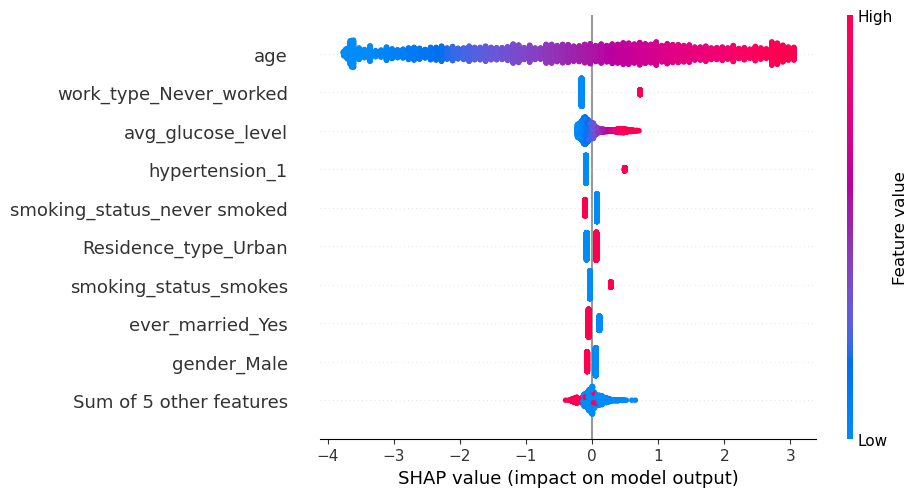

In [165]:
# Convert SHAP values to a standard NumPy array with numerical data type
shap_values_array = shap_values.values  # Access the raw SHAP values

# If shap_values_array is a list of arrays, convert it to a single array
if isinstance(shap_values_array, list) and all(isinstance(item, np.ndarray) for item in shap_values_array):
    shap_values_array = np.concatenate(shap_values_array)

# Ensure the data type is compatible with NumPy's round function (e.g., float64)
shap_values_array = shap_values_array.astype(np.float64)

# Create a new Explanation object with the converted SHAP values
shap_values_converted = shap.Explanation(
    values=shap_values_array,
    base_values=shap_values.base_values,
    data=shap_values.data,
    feature_names=shap_values.feature_names,
    display_data=shap_values.display_data,
)

# Now, plot the beeswarm using the converted SHAP values
shap.plots.beeswarm(shap_values_converted)

Try using only important features in the model

In [201]:
X_small = df.drop(columns=['stroke', 'heart_disease','Residence_type' ,'bmi','avg_glucose_level'])

X_small[['hypertension']] = X_small[['hypertension']].astype('object')

#Update the numeric and categorical cols
numerical_cols_small = X_small.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols_small = X_small.select_dtypes(include=['object']).columns.tolist()

print(numerical_cols_small) 
print(categorical_cols_small)

categorical_cols_small = [col for col in categorical_cols_small if col in X_small.columns]

X_small = pd.get_dummies(X_small, columns=categorical_cols_small, drop_first=True)

numerical_cols_small = [col for col in numerical_cols_small if col in X_small.columns]

if numerical_cols_small:
    scaler = StandardScaler()
    X_small[numerical_cols_small] = scaler.fit_transform(X[numerical_cols_small])
  
  
#Change bools into 1 and 0 numeric
X_small = X_small.map(lambda x: 1 if x is True else (0 if x is False else x))

['age']
['gender', 'hypertension', 'ever_married', 'work_type', 'smoking_status']


In [202]:
X_train_small, X_test_small, y_train, y_test = train_test_split (X_small, y, test_size=0.2, random_state=42, stratify=y)

model_small = LogisticRegression(class_weight='balanced')
model_small.fit(X_train_small, y_train)

LogisticRegression(class_weight='balanced')

In [212]:
y_pred = model_small.predict(X_test_small)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
 
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.7377690802348337
F1 Score: 0.2342857142857143
[[713 259]
 [  9  41]]


Dealing with large proportion of unknown smoking status
1) remove all records with unknown smoking status - not ideal bc 19% of stroke patients are missing smoke
2) group smoking into smoke yes/no- randomize unknowns into y/n
3) impute with random value btwn never, former, current
3) impute with predicted value

In [22]:
df['smoking_status'].value_counts()
#Large number of unknowns

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [57]:
pd.crosstab(df['stroke'], df['smoking_status']) 

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


In [ ]:
#Option 3: Randomly assign to never, former, or current smoker
import random

df2= df.copy()

unknown_mask = df2['smoking_status'] == 'Unknown'
unknown_indices = df2[unknown_mask].index

# Randomly assign smoking status to unknowns
smoking_statuses = ['never smoked', 'formerly smoked', 'smokes']
for index in unknown_indices:
    df2.loc[index, 'smoking_status'] = random.choice(smoking_statuses)

In [53]:
df2['smoking_status'].value_counts()

smoking_status
never smoked       2421
formerly smoked    1373
smokes             1316
Name: count, dtype: int64

In [58]:
pd.crosstab(df2['stroke'], df2['smoking_status']) 

smoking_status,formerly smoked,never smoked,smokes
stroke,,,
0,1285,2322,1254
1,88,99,62
